In [1]:
#TASK - implement fashion mnist using cnn
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.datasets import fashion_mnist
from keras.utils import to_categorical


In [2]:
fashion_mnist_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load and preprocess Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(fashion_mnist_classes)}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Number of classes: 10


In [3]:
def create_fashion_mnist_cnn():
    """
    Create a CNN model for Fashion MNIST classification
    """
    model = Sequential()
    
    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create and display model summary
fashion_cnn_model = create_fashion_mnist_cnn()
fashion_cnn_model.summary()

c:\Users\ashmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 619,114 (2.36 MB)

 Trainable params: 617,450 (2.36 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [4]:
# Train the Fashion MNIST CNN model
fashion_history = fashion_cnn_model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=30,
    validation_data=(x_test, y_test),
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = fashion_cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"\n📊 Fashion MNIST Test Accuracy: {test_accuracy:.4f}")
print(f"📊 Fashion MNIST Test Loss: {test_loss:.4f}")

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 155ms/step - accuracy: 0.7469 - loss: 0.7277 - val_accuracy: 0.7879 - val_loss: 0.5789
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 152ms/step - accuracy: 0.8589 - loss: 0.3959 - val_accuracy: 0.8913 - val_loss: 0.3080
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 174ms/step - accuracy: 0.8856 - loss: 0.3248 - val_accuracy: 0.8972 - val_loss: 0.2860
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 159ms/step - accuracy: 0.8981 - loss: 0.2879 - val_accuracy: 0.9066 - val_loss: 0.2505
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 160ms/step - accuracy: 0.9076 - loss: 0.2659 - val_accuracy: 0.9084 - val_loss: 0.2501
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 160ms/step - accuracy: 0.9121 - loss: 0.2482 - val_accuracy: 0.9124 - val_loss: 0.2440
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 151ms/step - accuracy: 0.9171 - loss: 0.2326 - val_accuracy: 0.9172 - val_loss: 0.2275
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 186ms/step - accuracy: 0.9225 - loss: 0

In [5]:
def predict_fashion_image(image_path, model):
    """
    Predict the class of an input image using the trained Fashion MNIST model
    
    Args:
        image_path: Path to the image file
        model: Trained Fashion MNIST CNN model
    
    Returns:
        Predicted class name and confidence
    """
    # Load and preprocess the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    
    # Resize to 28x28 (Fashion MNIST input size)
    img = img.resize((28, 28))
    
    # Convert to numpy array and normalize
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    
    # Invert colors if needed (Fashion MNIST has white background)
    if np.mean(img_array) > 0.5:  # If background is light
        img_array = 1.0 - img_array
    
    # Reshape for model input (28, 28, 1)
    img_array = img_array.reshape(1, 28, 28, 1)
    
    # Make prediction
    predictions = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    
    # Get top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    top_3_classes = [fashion_mnist_classes[i] for i in top_3_indices]
    top_3_confidences = [predictions[0][i] for i in top_3_indices]
    
    # Display the image with predictions
    plt.figure(figsize=(12, 5))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_array[0, :, :, 0], cmap='gray')
    plt.title(f'Predicted: {fashion_mnist_classes[predicted_class]}\nConfidence: {confidence:.4f}', 
              fontsize=12, fontweight='bold')
    plt.axis('off')
    
    # Confidence bar chart
    plt.subplot(1, 2, 2)
    y_pos = np.arange(len(fashion_mnist_classes))
    colors = ['red' if i == predicted_class else 'blue' for i in range(len(fashion_mnist_classes))]
    plt.barh(y_pos, predictions[0], align='center', alpha=0.7, color=colors)
    plt.yticks(y_pos, fashion_mnist_classes)
    plt.xlabel('Confidence')
    plt.title('Fashion MNIST Class Probabilities', fontweight='bold')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()
    
    print(f"👕 Fashion MNIST Prediction Results:")
    print(f"🎯 Top Prediction: {fashion_mnist_classes[predicted_class]} (Confidence: {confidence:.4f})")
    print(f"\n📊 Top 3 Predictions:")
    for i, (cls, conf) in enumerate(zip(top_3_classes, top_3_confidences)):
        print(f"   {i+1}. {cls}: {conf:.4f}")
    
    return fashion_mnist_classes[predicted_class], confidence

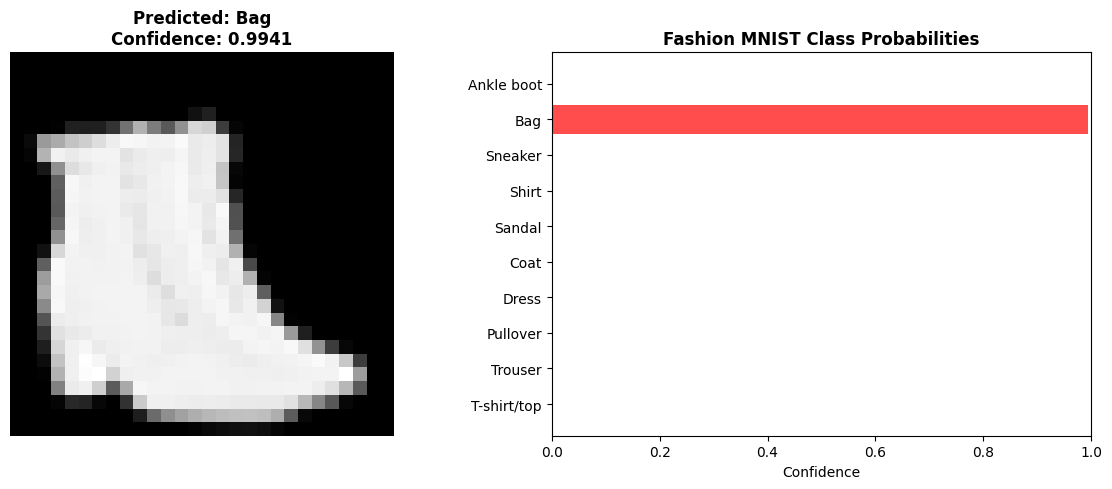

👕 Fashion MNIST Prediction Results:
🎯 Top Prediction: Bag (Confidence: 0.9941)

📊 Top 3 Predictions:
   1. Bag: 0.9941
   2. T-shirt/top: 0.0030
   3. Dress: 0.0011

🎉 Final Result:
Image: Sandel.jpg
Predicted Class: Bag
Confidence Score: 0.9941


In [6]:
image_path = "Sandel.jpg"
predicted_class, confidence = predict_fashion_image(image_path, fashion_cnn_model)

print(f"\n🎉 Final Result:")
print(f"Image: {image_path}")
print(f"Predicted Class: {predicted_class}")
print(f"Confidence Score: {confidence:.4f}")